# Choosing best markets for promotion - Analysis of new coders survey

Our goal is to identify the two best countries to advertise e-learning courses on programming. Most of them are on the web and mobile development, but some of them also cover other domains like data science, game development, etc. The raw data available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

We will use data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org) is a free e-learning platform that offers courses on web development. The company runs [a popular Medium publication](https://medium.freecodecamp.org), and their survey attracts our potential customers who might be interested in different topics.

In [1]:
# Importing modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting pandas options
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 5000)
pd.options.mode.chained_assignment = None  # Remove irrelevant warnings

## Getting familiar with the data

In [2]:
# Read data into pandas dataframe
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

# Explore number of rows and columns
print(survey.shape)

# Look at data structure
print(survey.head())

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columns that might be usefull for the analysis:
- CountryLive;
- JobInterestBackEnd;
- JobInterestDataEngr;
- JobInterestDataSci;
- JobInterestDevOps;
- JobInterestFrontEnd;
- JobInterestFullStack;
- JobInterestGameDev;
- JobInterestInfoSec;
- JobInterestMobile;
- JobInterestOther;
- JobInterestProjMngr;
- JobInterestQAEngr;
- JobInterestUX;
- JobRoleInterest;
- MonthsProgramming;
- MoneyForLearning;

These columns contain information on:
- location of potential leaners;
- desired jobs of potential leaners;
- experience of respondents;
- how much money they are ready to spend on learning;

So, based on this we can identify the areas of special interest.

## Checking sample representativity

Before the start we need to ensure that the sample data is representative. We will explore column JobRoleInterest to answer these questions. 

In [3]:
# Generate a frequency distribution table
survey['JobRoleInterest'].value_counts(
    normalize=True).sort_values()

Game Developer,   Mobile Developer, Information Security,   User Experience Designer                                                                                                                                                                                        0.000143
Information Security,   User Experience Designer, Full-Stack Web Developer, Back-End Web Developer,   Front-End Web Developer                                                                                                                                               0.000143
  Mobile Developer,   Product Manager,   Front-End Web Developer, Back-End Web Developer, Full-Stack Web Developer,   Data Scientist, Game Developer,   Quality Assurance Engineer,   User Experience Designer, Information Security, Data Engineer                         0.000143
  DevOps / SysAdmin,   Data Scientist, Data Engineer, Back-End Web Developer, Information Security, Full-Stack Web Developer                                             

We can see from the data that most of the leaners are interested in several subjects. The sample is still representative as people can be interested in more than one subjects.

Let's explore the following questions:
- which subjects are in the data set?
- how many people are interested in one subject vs several subjects?
- how many people are interested in each subject?

The dataset contains columns like 'JobInterestBackEnd' which reveal the respondent's interest in a particular subject. So, we have the following subjects (the 'JobInterest' part is omitted for each column name):
- BackEnd - Back-End Web Developer;
- DataEngr - Data Engineer;
- DataSci - Data Scientist;
- DevOps - DevOps / SysAdmin;
- FrontEnd - Front-End Web Developer;
- FullStack - Full-Stack Web Developer;
- GameDev - Game Developer;
- InfoSec - Information Security;
- Mobile - Mobile Developer;
- Other - self-explanatory;
- ProjMngr - Product Manager;
- QAEngr - Quality Assurance Engineer;
- UX - User Experience Designer;

We answer the remaining questions now. To make the work easier we will generate separate dataset which contains specified columns.

In [4]:
# Create a list of columns of interest and separate dataset
columns = ['CountryLive',
           'JobInterestBackEnd',
           'JobInterestDataEngr',
           'JobInterestDataSci',
           'JobInterestDevOps',
           'JobInterestFrontEnd',
           'JobInterestFullStack',
           'JobInterestGameDev',
           'JobInterestInfoSec',
           'JobInterestMobile',
           'JobInterestOther',
           'JobInterestProjMngr',
           'JobInterestQAEngr',
           'JobInterestUX',
           'JobRoleInterest',
           'MonthsProgramming',
           'MoneyForLearning']

jobs = survey[columns]

#Rename some columns
new_columns = ['CountryLive',
           'BackEnd',
           'DataEngr',
           'DataSci',
           'DevOps',
           'FrontEnd',
           'FullStack',
           'GameDev',
           'InfoSec',
           'Mobile',
           'Other',
           'ProjMngr',
           'QAEngr',
           'UX',
           'RoleInterest',
           'MonthsProgramming',
           'MoneyForLearning']
jobs.columns = new_columns

# Create a column with a number of subject a person is
# interested in
jobs['NumSub'] = jobs[['BackEnd', 'DataEngr',
                                'DataSci', 'DevOps',
                                'FrontEnd', 'FullStack',
                                'GameDev', 'InfoSec',
                                'Mobile', 'Other',
                                'ProjMngr', 'QAEngr',
                                'UX']].sum(axis=1)

# Sample 10 rows randomly to check consistency of the data
sample = jobs[['BackEnd', 'DataEngr',
               'DataSci', 'DevOps',
               'FrontEnd', 'FullStack',
               'GameDev', 'InfoSec',
               'Mobile', 'Other',
               'ProjMngr', 'QAEngr',
               'UX', 'RoleInterest',
               'NumSub']].sample(10, random_state=1)
print(sample)

       BackEnd  DataEngr  DataSci  DevOps  FrontEnd  FullStack  GameDev  \
15555      NaN       NaN      NaN     NaN       NaN        NaN      NaN   
7715       NaN       1.0      1.0     NaN       NaN        NaN      1.0   
153        NaN       NaN      NaN     NaN       1.0        1.0      NaN   
7463       NaN       NaN      NaN     NaN       NaN        NaN      NaN   
272        NaN       NaN      NaN     NaN       NaN        NaN      NaN   
17894      1.0       1.0      1.0     NaN       1.0        1.0      1.0   
6840       NaN       NaN      NaN     NaN       NaN        NaN      NaN   
11713      NaN       NaN      NaN     NaN       NaN        NaN      NaN   
7182       NaN       NaN      NaN     NaN       NaN        1.0      NaN   
15289      NaN       NaN      NaN     NaN       NaN        NaN      NaN   

       InfoSec  Mobile Other  ProjMngr  QAEngr   UX  \
15555      NaN     NaN   NaN       NaN     NaN  NaN   
7715       1.0     NaN   NaN       NaN     NaN  NaN   
153      

We can see that the number of subject in RoleInterest column is consistent with NumSub one. We also observed that some rows contain nan values. We will remove these rows and create a bar chart to visualize the difference in a number of subjects.

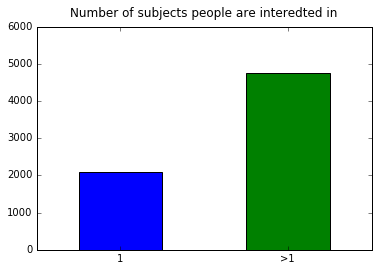

In [5]:
# Remove rows with nan values
jobs.dropna(how='any', subset=['RoleInterest', 'NumSub'],
            inplace=True)

# Create Pandas series which contains number of people
# who are interested in one subject and who are interested
# in more than 1
pd.Series(
    {
        '1': jobs['NumSub'][jobs['NumSub'] == 1].count(),
        '>1': jobs['NumSub'][jobs['NumSub'] > 1].count()
    }
).plot.bar(ylim=(0, 6000), rot=0)

# Set title
plt.title('Number of subjects people are interedted in',
         y=1.02)


It's a quite common that people interested more the one subject.

## Finding the number of people interested in each subject

We will generate a bar chart to answer this question. We will skip column 'Other' as it contains only 227 non-null values and would not significantly impact on the analysis.

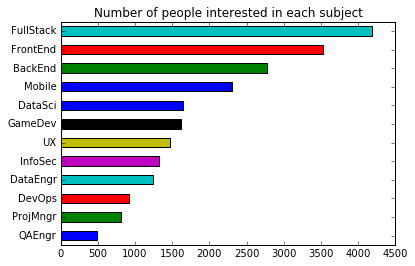

In [6]:
columns_of_interest = ['BackEnd', 'DataEngr', 'DataSci',
                       'DevOps', 'FrontEnd', 'FullStack',
                       'GameDev', 'InfoSec', 'Mobile',
                       'ProjMngr', 'QAEngr', 'UX']

# Create a dictionary which contains number of people who
# are interested in particular subject
data = {}
for col in columns_of_interest:
    data[col] = jobs[col].sum()

# Create Pandas series to store the data and
# horizontal generate bar chart
data = pd.Series(data).sort_values()
data.plot.barh(title='Number of people interested in each subject')

The majority of learners are interested in web development and mobile development. We can conclude that:
- the majority of people are interested in several subjects;
- the data contains information on a wide range of subjects. But, it might be biased towards web development, because freeCodeCamp course is focused on this subject.

We can consider this sample as representative.

## Identify the best countries for advertising

We will look at how the potential customers are distributed among each country and display the top 10 of them.

In [7]:
# Generate a frequency distribution table
# for CountryLive columns
jobs['CountryLive'].value_counts(normalize=True).head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

We can see countries with the highest percentages of customers. Based on these results we should choose USA and India to advertise our products.

But, our choice should be based on learners willingness to pay for the learning. The MoneyForLearning column describes in the amount of money spent by participants from the moment they started coding until the moment they completed the survey.

Our company offers a monthly subscription. So, we need to figure out how much money each learner have spent per month. 

We are also going to focus our analysis on USA, India, United Kingdom, and Canada. The reasons for this are:
- these countries have the highest absolute frequencies in our sample;
- our products are in English and English is an official language in all these four countries.

In [8]:
# Replace 0 to 1 in order to avoid zero division
jobs['MonthsProgramming'].replace(0, 1, inplace=True)

# Create a column with average monthly spending
# on learning
jobs['MoneyPerMonth'] = (jobs['MoneyForLearning'] /
                         jobs['MonthsProgramming'])

# Drop rows where columns MoneyPerMonth and CountryLive
# are nan
jobs.dropna(how='any',
            subset=['MoneyPerMonth', 'CountryLive'],
            inplace=True)

# Display data on choosen countries
data = (jobs[['CountryLive', 'MoneyPerMonth']]
        .groupby(by='CountryLive')
        .mean()
        .sort_values('MoneyPerMonth', ascending=False))

print(data['MoneyPerMonth'][['United States of America',
           'India', 'United Kingdom',
           'Canada']])

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


Let's consider [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) for each country on 2017 (places):
- US - 7;
- India - 22;
- UK - 139;
- Canada - 16;

The results for India, Canada, and the UK look a bit surprising. We can assume that there are some outliers in our data which influence the mean. Or the data is not representative enough. Let's explore this more carefully.

## Explore distribution of monthly spending on learning

We will create a box plot for each country to identify the existence of the outliers. 

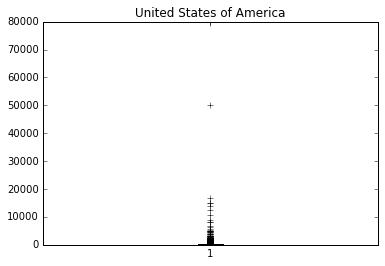

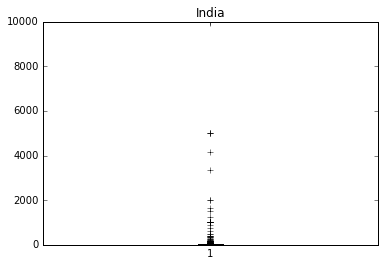

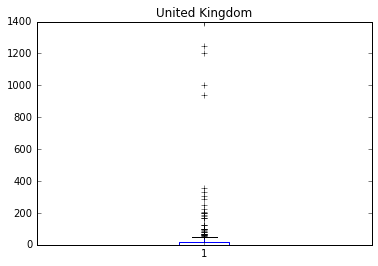

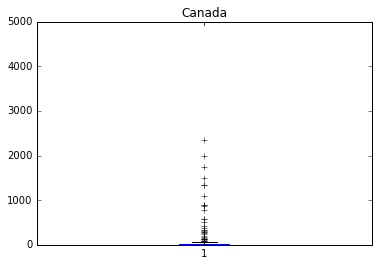

In [9]:
# Display box plot for each country
for country in ['United States of America',
           'India', 'United Kingdom',
           'Canada']:
    plt.boxplot(
        jobs[jobs['CountryLive'] == country][
            'MoneyPerMonth'].values)
    plt.title(country)
    plt.show()

There is a bunch of outliers for each country. We will now remove outliers and recalculate the mean for each country. 

In [10]:
# Define function which will remove outliers
def remove_outliers(dataset, column):
    return dataset[
        np.abs(dataset[column] - dataset[column].mean()
              ) <= 3*dataset[column].std()]

# Remove outliers and recalculate the mean for each country
means = {}
for c in ['United States of America', 'India',
          'United Kingdom', 'Canada']:
    means[c] = remove_outliers(
        jobs[jobs['CountryLive'] == c],
        'MoneyPerMonth')['MoneyPerMonth'].mean()
print(pd.Series(means))

Canada                       62.363676
India                        65.758763
United Kingdom               25.245838
United States of America    142.654608
dtype: float64


Based on this data we should choose the USA as one market to advertise our product. But, the second choice is not so clear. The means for Canada and India are close, so it is not obvious which market to choose. Let's take a look at the absolute and relative number of customers in the USA, Canada, and India. 

In [11]:
# Find the number of customers for each country
# and excluding outliers
customers = {}
for c in ['United States of America', 'India', 'Canada']:
    customers[c] = remove_outliers(
    jobs[jobs['CountryLive'] == c],
        'MoneyPerMonth')['MoneyPerMonth'].count()

# Find the percentage of customer for each country
# and display dataframe
total = sum(customers.values())
for key in customers.keys():
    customers[key] = [customers[key],
                     customers[key] / total]
print(pd.DataFrame.from_dict(data=customers,
                            orient='index'))

                             0         1
United States of America  2920  0.808416
India                      457  0.126523
Canada                     235  0.065061


We see that the potential customers are splitted between countries:
- 81% for USA;
- 13% for India;
- 6% for Canada;

So, the final proposal is to split the promotion budget accordingly. 

# Conclusion

The aim of the project was to find the two best countries to advertise e-learning courses on programming. We used freeCodeCamp survey data to identify target countries. First, we checked representativity of the sample and next find the means for each country. 

We found that:
- most of the learners are interested in several subjects;
- the majority of learners are interested in web and mobile development;
- the best countries to advertise our product is USA, India, and Canada;
- we propose to split advertising budget 81%/13%/6% for USA/India/Canada based on the number of customers in each country.